### Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어 처리 기술을 접목해서 최근에는 많이 진행되고 있음
  - 자연어 처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문


#### 자연어 처리 프로세스

- 텍스트 마이닝 분석 프로세스

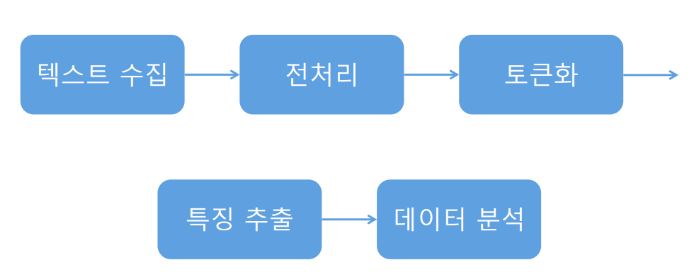

### 1. 데이터 수집 및 로딩

- https://github.com/smilegate-ai/korean_unsmile_dataset
- 스마일게이트의 한국어 혐오표현 데이터 셋 활용

In [1]:
# 현재 작업 디렉토리 및 폴더 확인
import os
print(os.getcwd())
print(os.listdir(os.getcwd()))

/content
['.config', 'drive', 'sample_data']


In [2]:
# 작업 디렉토리 변경
%cd "./drive/MyDrive/Colab Notebooks/텍스트마이닝"

/content/drive/MyDrive/Colab Notebooks/텍스트마이닝


In [ ]:
print(os.getcwd())
print(os.listdir(os.getcwd()))

In [4]:
import pandas as pd

In [5]:
# 훈련용 데이터, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter="\t")
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter="\t")

In [ ]:
display(train.head())
display(test.head())

In [ ]:
# 결측치 확인
display(train.isnull().info())
display(test.isnull().info())

#### 단어 빈도 분석
- 워드 카운드 : 단어의 빈도를 측정하여 분석

In [ ]:
text_train = train[train["악플/욕설"] == 1]["문장"]  # 특정 혐오표현 텍스트가 들어 있는 문장열 추출
text_train

In [9]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
words = word_tokenize(list(text_train.values)[0])
words

['나이쳐먹고', '피시방가는', '놈들은', '대가리에', '똥만찬', '놈들임']

In [19]:
# 띄어쓰기 중심으로 토큰화 : python code 활용
badword_tokens = [t for doc in text_train for t in doc.split(" ")]

In [ ]:
badword_tokens

In [13]:
# 단어의 빈도 세기
from collections import Counter

In [21]:
counter = Counter(badword_tokens)  # 같은 단어들의 갯수 세기

In [ ]:
counter.most_common(40)

In [ ]:
# 워드클라우드를 위한 한글폰트 설치
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [18]:
# 객체 생성
wc = WordCloud(background_color="white",  # 배경색 설정
               random_state=715,  # 난수 seed 고정
               font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [23]:
input_str = " ".join(badword_tokens)  # 쪼개진 토큰들을 하나의 문자열로 병합

In [24]:
wc_rs = wc.generate_from_text(input_str)  # 문자열로부터 워드클라우드 생성

In [25]:
# matplotlib을 이용한 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # 다운받은 폰트를 maplotlib의 폰트로 설정

In [35]:
from PIL import Image, ImageFilter
wc_image = wc_rs.to_image()
blurred_image = wc_image.filter(ImageFilter.GaussianBlur(radius=6))  # 블러처리

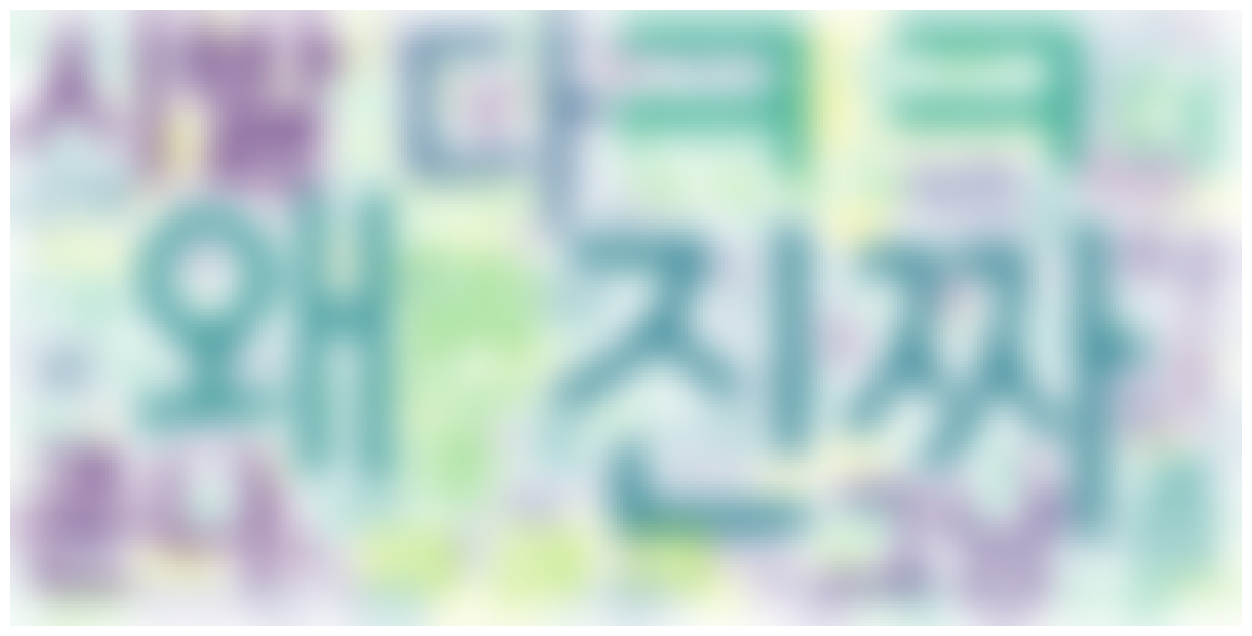

In [36]:
plt.figure(figsize=(20, 8))  # 그림을 그리는 그림판 셋팅
plt.imshow(blurred_image)  # 그림을 보여줘라
plt.axis('off')  # 눈금X
plt.show()